# Access FLUXCOM-X-BASE products

This notebook shows an example how to access FLUXCOM-X-BASE products, which are publicly available via an object store provided by [DKRZ](https://www.dkrz.de/en/dkrz-partner-for-climate-research?set_language=en).  

### Setup
In order to run this notebook, you need to install [`xcube_icosdp`](https://github.com/xcube-dev/xcube-icosdp), following the [README](../README.md).

Note that [`xcube_icosdp`](https://github.com/xcube-dev/xcube-icosdp) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

Now, we first import everything we need:

In [1]:
%%time
import dask
from xcube.core.store import new_data_store

dask.config.set(scheduler="threads", nb_workers=4)

CPU times: user 6.04 s, sys: 531 ms, total: 6.57 s
Wall time: 4.86 s


We initialize a new data store.

In [2]:
store = new_data_store("icosdp")

The data IDs can be streamed by executing the following cell.

In [3]:
store.list_data_ids()

['NEE', 'GPP', 'ET', 'ET_T']

We can describe the dataset using the `describe_data` method, as shown below.  

In [4]:
store.describe_data("FLUXCOM-X-BASE_NEE")

Next we can open the data. We can first view the available opening parameters, which can be added to the `open_data` method in the subsequent cell. 

In [5]:
open_params = store.get_open_data_params_schema(data_id="NEE")
open_params

We can now open the Net Ecosystem Exchange (NEE) dataset, where accessing the entire dataset is the default.

In [6]:
%%time
ds = store.open_data("NEE")
ds

CPU times: user 53.9 ms, sys: 3.1 ms, total: 57 ms
Wall time: 308 ms


<xarray.Dataset> Size: 19TB
Dimensions:        (time: 7670, hour: 24, lat: 3600, lon: 7200, nbnds: 2)
Coordinates:
  * time           (time) datetime64[ns] 61kB 2001-01-01 ... 2021-12-31
  * hour           (hour) float64 192B 0.0 1.0 2.0 3.0 ... 20.0 21.0 22.0 23.0
  * lat            (lat) float64 29kB 89.97 89.92 89.88 ... -89.88 -89.92 -89.97
  * lon            (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
    hour_bnds      (hour, nbnds) int64 384B dask.array<chunksize=(24, 2), meta=np.ndarray>
    lat_bnds       (lat, nbnds) float64 58kB dask.array<chunksize=(40, 2), meta=np.ndarray>
    lon_bnds       (lon, nbnds) float64 115kB dask.array<chunksize=(40, 2), meta=np.ndarray>
Dimensions without coordinates: nbnds
Data variables:
    NEE            (time, hour, lat, lon) float32 19TB dask.array<chunksize=(1461, 24, 40, 40), meta=np.ndarray>
    land_fraction  (lat, lon) float64 207MB dask.array<chunksize=(40, 40), meta=np.ndarray>
Attributes: (12/26)
    contact:                    The FLUXCOM-X team, fluxcomx@bgc-jena.mpg.de
    contributor:                ['Jacob Nelson https://orcid.org/0000-0002-46...
    conventions:                CF-1.8
    creation_date:              2023-11-17
    creator:                    The FLUXCOM-X team, fluxcomx@bgc-jena.mpg.de
    crs:                        WGS 84 / Plate Carree
    ...                         ...
    publisher_url:              http://fluxcom.org/
    references:                 
    source:                     ['MODIS Reflectance 10.5067/MODIS/MCD43C2.006...
    time_coverage_end:          2021-12-31T00:00:00.000000000
    time_coverage_start:        2001-01-01T00:00:00.000000000
    training_features:          ['TA', 'VPD', 'SW_IN', 'SW_IN_POT', 'dSW_IN_P...

We can also open a subset of the dataset by using the opening parameters `time_range` and `bbox`.

In [7]:
%%time
ds = store.open_data(
    "NEE",
    time_range=("2020-01-01", "2021-12-31"),
    bbox=[5, 45, 10, 50]
)
ds

CPU times: user 125 ms, sys: 18.8 ms, total: 144 ms
Wall time: 390 ms


<xarray.Dataset> Size: 702MB
Dimensions:        (time: 731, hour: 24, lat: 100, lon: 100, nbnds: 2)
Coordinates:
  * time           (time) datetime64[ns] 6kB 2020-01-01 ... 2021-12-31
  * hour           (hour) float64 192B 0.0 1.0 2.0 3.0 ... 20.0 21.0 22.0 23.0
  * lat            (lat) float64 800B 49.98 49.92 49.88 ... 45.12 45.08 45.02
  * lon            (lon) float64 800B 5.025 5.075 5.125 ... 9.875 9.925 9.975
    hour_bnds      (hour, nbnds) int64 384B dask.array<chunksize=(24, 2), meta=np.ndarray>
    lat_bnds       (lat, nbnds) float64 2kB dask.array<chunksize=(40, 2), meta=np.ndarray>
    lon_bnds       (lon, nbnds) float64 2kB dask.array<chunksize=(40, 2), meta=np.ndarray>
Dimensions without coordinates: nbnds
Data variables:
    NEE            (time, hour, lat, lon) float32 702MB dask.array<chunksize=(731, 24, 40, 40), meta=np.ndarray>
    land_fraction  (lat, lon) float64 80kB dask.array<chunksize=(40, 40), meta=np.ndarray>
Attributes: (12/26)
    contact:                    The FLUXCOM-X team, fluxcomx@bgc-jena.mpg.de
    contributor:                ['Jacob Nelson https://orcid.org/0000-0002-46...
    conventions:                CF-1.8
    creation_date:              2023-11-17
    creator:                    The FLUXCOM-X team, fluxcomx@bgc-jena.mpg.de
    crs:                        WGS 84 / Plate Carree
    ...                         ...
    publisher_url:              http://fluxcom.org/
    references:                 
    source:                     ['MODIS Reflectance 10.5067/MODIS/MCD43C2.006...
    time_coverage_end:          2021-12-31T00:00:00.000000000
    time_coverage_start:        2001-01-01T00:00:00.000000000
    training_features:          ['TA', 'VPD', 'SW_IN', 'SW_IN_POT', 'dSW_IN_P...

As an example, we plot the Net Ecosystem Exchange (NEE) for a summer time-stamp below. Be aware that plotting the spatial domain may take a while, because the dataset is chunked mainly along time, which is optimized for efficient time series analysis.

CPU times: user 1min 7s, sys: 37.9 s, total: 1min 45s
Wall time: 4min 8s


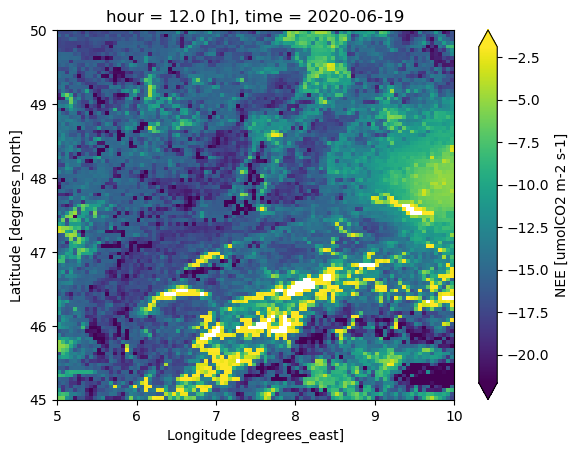

In [8]:
%%time
ds.NEE.isel(time=170, hour=12).plot(robust=True)